# Q1. DIT Sampler for Poisson Distribution

In [49]:
using Plots
using StatsPlots
using Distributions

In [50]:
function poisson_sampler(lambda)
    U = rand()
    i=0
    p = exp(-lambda)
    A = p
    while true
        if U < A
            return i
        else
            p = (lambda*p)/(i+1)
            A = A+p
            i = i+1
        end
    end
end

poisson_sampler (generic function with 1 method)

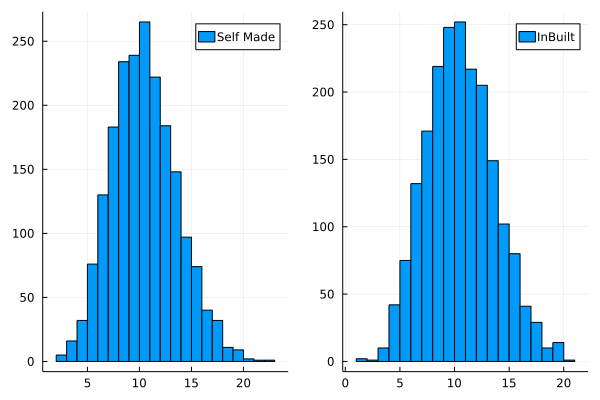

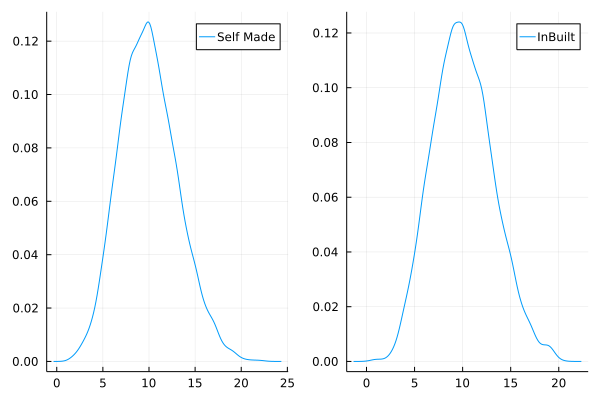

Mean for Self Made Poisson: 9.984007996002
Actual mean value :10
Variance for Self Made Poisson: 9.827744127936038
Actual variance value :10


In [101]:
# For creating a distribution using self Made and comparing it with InBuilt Poisson Distribution
function Poisson_compare(lambda, iterations=2000)
    X = []
    for j=0:iterations
        push!(X,poisson_sampler(lambda))
    end

    Y = rand(Poisson(lambda),iterations)

    display(plot(histogram(X,bins = maximum(X)-minimum(X), label="Self Made"),histogram(Y,bins = maximum(Y)-minimum(Y), label="InBuilt"), layout = 2))
    println("Mean for Self Made Poisson: ",mean(X))
    println("Actual mean value :", lambda)
    println("Variance for Self Made Poisson: ",var(X))
    println("Actual variance value :", lambda)

    display(plot(density(X), density(Y), layout = 2, label= ["Self Made" "InBuilt"]))

end
Poisson_compare(10)


# Q2 DAR Sampler for Binomial Distribution(Using Poisson Proposal)

In [125]:
function binomial_sampler(n,p,c,lambda)  
    while true
        U = rand()
        Y = poisson_sampler(lambda)
        if(U < ((exp(lambda)*binomial(BigInt(n),BigInt(Y))*(p^(Y))*((1-p)^(n-Y))*factorial(BigInt(Y)))/BigInt(lambda^Y))/c)
            return Y
        end
    end 
end

binomial_sampler (generic function with 3 methods)

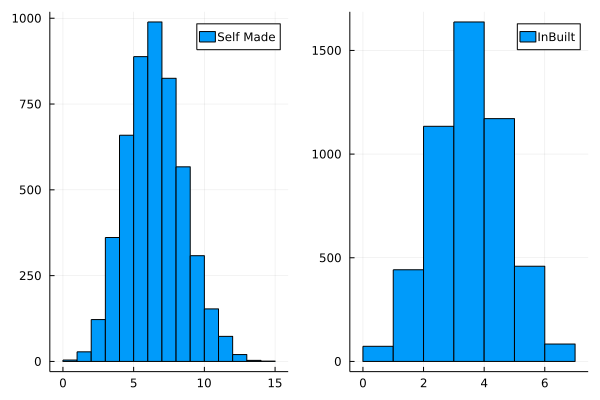

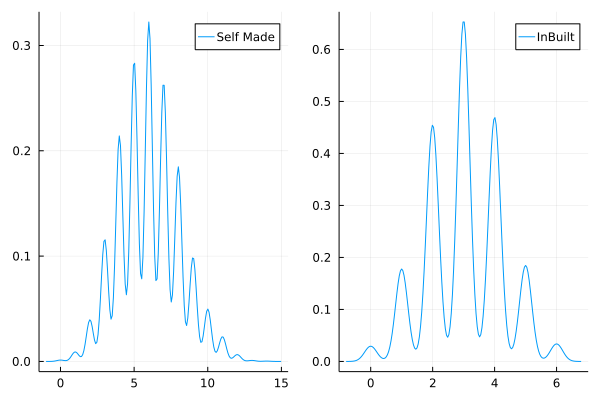

Mean for Self Made Binomial: 6.013597280543891
Actual mean value :6.0
Variance for Self Made Binomial: 4.127415076984592
Actual variance value :4.199999999999999


In [132]:
function binomial_compare(n,p, iterations=5000)
    X = []
    lambda=n*p
    c = findmax(map(x->((exp(lambda)*binomial(BigInt(n),BigInt(x))*(p^(x))*((1-p)^(n-x))*factorial(BigInt(x)))/(BigInt(lambda^x))),0:1:n))[1]
    for j=0:iterations
        push!(X,binomial_sampler(n,p,c,lambda))
    end

    Y = rand(Binomial(lambda),iterations)
    display(plot(histogram(X,bins = maximum(X)-minimum(X), label="Self Made"),histogram(Y,bins = maximum(Y)-minimum(Y), label="InBuilt"), layout = 2))
    println("Mean for Self Made Binomial: ",mean(X))
    println("Actual mean value :", n*p)
    println("Variance for Self Made Binomial: ",var(X))
    println("Actual variance value :", n*p*(1-p))

    display(plot(density(X), density(Y), layout = 2, label= ["Self Made" "InBuilt"]))

end
binomial_compare(20,0.3)

